# Laboratory Exercise 1 - Starter (2 points)

In this assignment, you will perform **web scraping** on the website [https://books.toscrape.com/](https://books.toscrape.com/).

Your tasks are as follows:

1. **Extract** `image_url`, `rating`, `title`, and `price` for the 20 books displayed on the main page.
2. **Organize the data** into a **pandas.DataFrame**.
3. **Visualize** the collected data according to the given requirements.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_1_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_1_12346.ipynb`.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [2]:
url = "https://books.toscrape.com/"

In [3]:
response = requests.get(url)

In [4]:
page_element = BeautifulSoup(response.text, "html.parser")

In [5]:
product_elements = page_element.select("article.product_pod")

**(0.2 points)** Implement the `get_image_url` function to return the image URL of a given product element using **BeautifulSoup**. For example, the first product on the page has the image URL `"media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"`.

In [6]:
### AUTOMATICALLY GRADED TASK
def get_image_url(product_element):
    "Get the URL of the image from the given product element using BeautifulSoup."

    img_el = product_element.select_one(".image_container img")

    return img_el["src"]

Test your implementation by running the following cell.

In [7]:
### TEST
assert get_image_url(product_elements[0]) == "media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"

**(0.2 points)** Implement the `get_rating` function to return the product’s rating as an integer between 1 and 5. For example, the first product on the page has a rating of `3`.

In [8]:
### AUTOMATICALLY GRADED TASK
def get_rating(product_element):
    "Get the rating (1-5) of the given product element."

    RATINGS = { "One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5 }

    for cls, num in RATINGS.items():
        if product_element.select_one("." + cls) != None:
            return num

    return 0 # Default

Test your implementation by running the following cell.

In [9]:
### TEST
assert get_rating(product_elements[0]) == 3

**(0.2 points)** Implement the `get_title` function to return the full title of the given product as a string. For example, the first product on the page has the title `"A Light in the Attic"`.

In [10]:
### AUTOMATICALLY GRADED TASK
def get_title(product_element):
    "Get the full-length title of the given product element."

    return product_element.select_one("h3 a")["title"]


Test your implementation by running the following cell.

In [11]:
### TEST
assert get_title(product_elements[0]) == "A Light in the Attic"

**(0.2 points)** Implement the `get_price` function to return the product’s price as a float. For example, the first product on the page has a price of `51.77`.

In [12]:
def get_price(product_element):
    "Get the price of the given product element."

    txt = product_element.select_one(".price_color").text
    txt = txt[txt.find("£")+1:]
    return float(txt)



Test your implementation by running the following cell.

In [13]:
### TEST
assert get_price(product_elements[0]) == 51.77

In [14]:
def get_attributes(product_element):
    return {
        "image_url": get_image_url(product_element),
        "rating": get_rating(product_element),
        "title": get_title(product_element),
        "price": get_price(product_element),
    }

In [15]:
get_attributes(product_elements[0])

{'image_url': 'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'rating': 3,
 'title': 'A Light in the Attic',
 'price': 51.77}

In [16]:
product_data = [get_attributes(product_element) for product_element in product_elements]

In [17]:
df = pd.DataFrame(product_data)

In [18]:
df.head()

,image_url,rating,title,price
0,media/cache/2c/da/2cdad67c44b002e7ead0cc35693c...,3,A Light in the Attic,51.77
1,media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f...,1,Tipping the Velvet,53.74
2,media/cache/3e/ef/3eef99c9d9adef34639f51066202...,1,Soumission,50.10
3,media/cache/32/51/3251cf3a3412f53f339e42cac213...,4,Sharp Objects,47.82
4,media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c...,5,Sapiens: A Brief History of Humankind,54.23


***If you were not able to complete the previous tasks successfully, you may uncomment the following line to continue with the next steps.***

In [19]:
# df = pd.read_csv("products.csv")

**(0.2 points)** Create a visualization showing the number of products for each rating (1-5).

In [20]:
### MANUALLY GRADED TASK
def plot_counts_by_rating(df):
    "Plot the count of products by rating."""

    df["rating"].value_counts().sort_index().plot.bar()

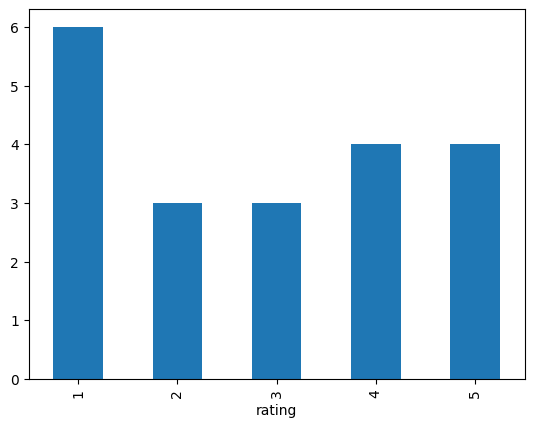

In [21]:
plot_counts_by_rating(df)

**(0.2 points)** Create a visualization showing the distribution of product prices.

In [41]:
### MANUALLY GRADED TASK
def plot_price_distribution(df):
    """Plot the price distribution of the products."""

    # TODO ???

    plt.boxplot(df["price"])

    # df['price'].hist(bins=20)

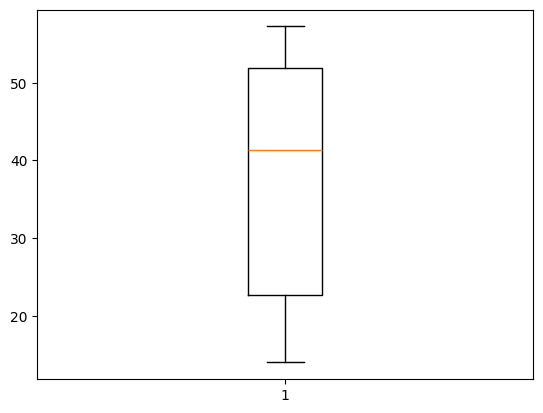

In [42]:
plot_price_distribution(df)

**(0.2 points)** Create a visualization showing the distribution of product title lengths.

In [24]:
### MANUALLY GRADED TASK
def plot_title_length_distribution(df):
    """Plot the distribution of the title lengths."""
    # ????

    # df["title"].apply(lambda t: len(t)).value_counts().sort_index().plot.bar()

    plt.hist(df["title"].apply(len), bins=30)
    plt.show()

    # plt.boxplot(df["title"].apply(len), vert=False)
    # plt.show()

    # df["title"].apply(len).plot(kind='kde')


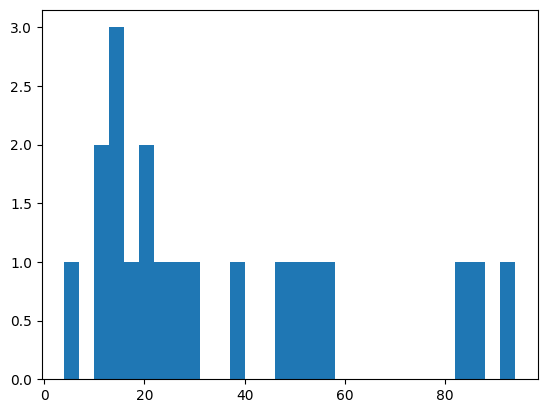

In [25]:
plot_title_length_distribution(df)


**(0.2 points)** Create box plots showing the distribution of product prices for each rating.

In [26]:
### MANUALLY GRADED ANSWER
def plot_price_distribution_per_rating(df):
    """Plot the price distribution of the products per rating."""

    sns.boxplot(df[["rating", "price"]], x="rating", y="price")

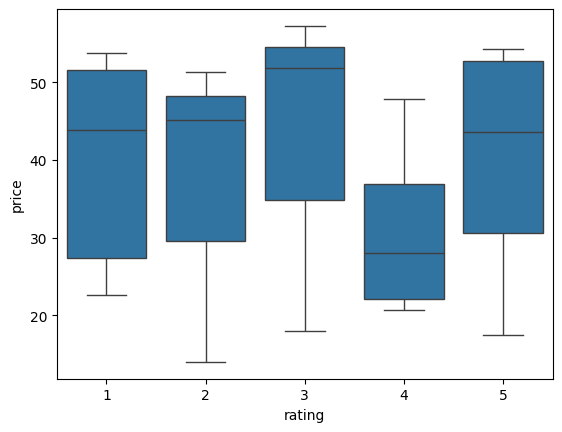

In [27]:
plot_price_distribution_per_rating(df)


**(0.2 points)** Create a heatmap showing the Pearson correlation between the numeric variables in the dataset.

In [28]:
### MANUALLY GRADED ANSWER
def plot_corr_heat_map(df):
    """Plot the Pearson correlation between the numeric variables in the dataset using a heat map."""

    sns.heatmap( df.corr('pearson', numeric_only=True), annot=True )


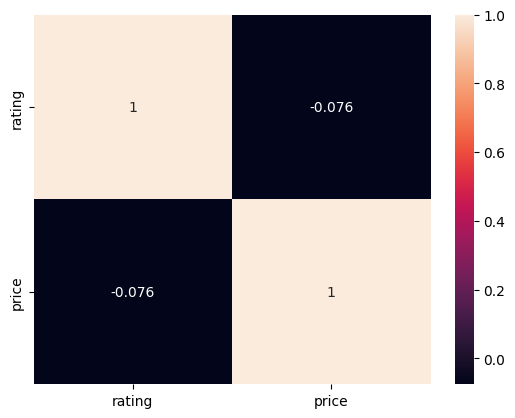

In [29]:
plot_corr_heat_map(df)

**(0.2 points)** Compute the `count`, `mean`, `std`, `min`, `25%`, `median`, `75%`, and `max` statistics of product prices grouped by rating (1-5).

In [85]:
### MANUALLY GRADED ANSWER
def compute_descriptive_stats_for_price_per_rating(df):
    """
    Compute the `count`, `mean`, `std`, `min`, `25% quantile`, `median`, `75% quantile`, and `max` statistics
    for the product's prices per rating (1-5). Return them as a `pandas.DataFrame`.
    """

    return df.groupby('rating')[['price']].describe()


In [86]:
compute_descriptive_stats_for_price_per_rating(df)

price                                                              
       count       mean        std    min      25%     50%      75%    max
rating                                                                    
1        6.0  40.018333  14.178174  22.65  27.3075  43.845  51.6375  53.74
2        3.0  36.830000  20.018382  13.99  29.5800  45.170  48.2500  51.33
3        3.0  42.316667  21.296472  17.93  34.8500  51.770  54.5100  57.25
4        4.0  31.105000  12.460865  20.66  22.1150  27.970  36.9600  47.82
5        4.0  39.750000  17.186613  17.46  30.6300  43.655  52.7750  54.23

#Додатно selenium

Инсталирање selenium, chromium-browser и chromium-chromedriver.

In [91]:
!pip install selenium

!apt-get update
!apt-get install -y chromium-browser

!apt install chromium-chromedriver

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cli.github.com/packages stable InRelease [3,917 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,594 kB]
Get:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Pack

Импортирање на потребни пакети

In [115]:
import time

from selenium import webdriver
from selenium.webdriver.common.by import By

from urllib.parse import urljoin

Зимање книги по категорија

In [158]:
NEXT_BTN_SELECTOR = "li.next > a"

def get_books_in_category(driver, url:str, category:str):
  RATINGS = { "One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5 }
  res = []

  driver.get(url)
  time.sleep(0.5)
  while True:
    product_elements = driver.find_elements(By.CSS_SELECTOR, "article.product_pod")


    for prod_elm in product_elements:
      img_url = prod_elm.find_element(By.CSS_SELECTOR, 'img').get_attribute('src')
      title = prod_elm.find_element(By.CSS_SELECTOR, "h3 a").get_attribute("title")
      price = float( prod_elm.find_element(By.CSS_SELECTOR, ".price_color").text.replace("£", "") )

      rating = 0
      for cls, num in RATINGS.items():
        try:
          prod_elm.find_element(By.CLASS_NAME, cls)
          rating = num
          break
        except:
          continue

      res.append({
          "image_url": img_url,
          "rating": rating,
          "title": title,
          "price": price,
          "category": category
      })

    next_btn_arr =driver.find_elements(By.CSS_SELECTOR, NEXT_BTN_SELECTOR)
    if len(next_btn_arr) != 0:
      next_btn_arr[0].click()
      time.sleep(0.5)
    else:
      break

  return res


Поставување на driver за скрапање

In [160]:
def get_driver():
  options = webdriver.ChromeOptions()
  options.add_argument('--verbose')
  options.add_argument('--no-sandbox')
  options.add_argument('--headless')
  # options.add_argument('--disable-gpu')
  # options.add_argument('--windows-size=1920, 1200')
  # options.add_argument('--disable-dev-shm-usage')

  return webdriver.Chrome(options=options)

Собирање книги од секоја категорија

In [163]:
URL = "https://books.toscrape.com"

driver = get_driver()

driver.get(URL)
time.sleep(2)

CATEGORIES_SELECTOR = "div.side_categories > ul > li > ul > li > a"

cat_elems = [(link.get_attribute('href'), link.text) for link in driver.find_elements(By.CSS_SELECTOR, CATEGORIES_SELECTOR)]

colected = []

i = 1
progress_len = len(cat_elems)
for href, category in cat_elems:
  cat_url = urljoin(URL, href)
  books = get_books_in_category(driver, cat_url, category)
  colected.extend(books)

  print("COMPLETED:", category, f"{i}/{progress_len}")
  i+=1

cat_df = pd.DataFrame(colected)

driver.quit()


COMPLETED: Travel 1/50
COMPLETED: Mystery 2/50
COMPLETED: Historical Fiction 3/50
COMPLETED: Sequential Art 4/50
COMPLETED: Classics 5/50
COMPLETED: Philosophy 6/50
COMPLETED: Romance 7/50
COMPLETED: Womens Fiction 8/50
COMPLETED: Fiction 9/50
COMPLETED: Childrens 10/50
COMPLETED: Religion 11/50
COMPLETED: Nonfiction 12/50
COMPLETED: Music 13/50
COMPLETED: Default 14/50
COMPLETED: Science Fiction 15/50
COMPLETED: Sports and Games 16/50
COMPLETED: Add a comment 17/50
COMPLETED: Fantasy 18/50
COMPLETED: New Adult 19/50
COMPLETED: Young Adult 20/50
COMPLETED: Science 21/50
COMPLETED: Poetry 22/50
COMPLETED: Paranormal 23/50
COMPLETED: Art 24/50
COMPLETED: Psychology 25/50
COMPLETED: Autobiography 26/50
COMPLETED: Parenting 27/50
COMPLETED: Adult Fiction 28/50
COMPLETED: Humor 29/50
COMPLETED: Horror 30/50
COMPLETED: History 31/50
COMPLETED: Food and Drink 32/50
COMPLETED: Christian Fiction 33/50
COMPLETED: Business 34/50
COMPLETED: Biography 35/50
COMPLETED: Thriller 36/50
COMPLETED: Cont

Проверка на соберените податоци

In [165]:
cat_df.head()


,image_url,rating,title,price,category
0,https://books.toscrape.com/media/cache/27/a5/2...,2,It's Only the Himalayas,45.17,Travel
1,https://books.toscrape.com/media/cache/57/77/5...,4,Full Moon over Noah’s Ark: An Odyssey to Mount...,49.43,Travel
2,https://books.toscrape.com/media/cache/9a/7e/9...,3,See America: A Celebration of Our National Par...,48.87,Travel
3,https://books.toscrape.com/media/cache/d5/bf/d...,2,Vagabonding: An Uncommon Guide to the Art of L...,36.94,Travel
4,https://books.toscrape.com/media/cache/98/c2/9...,3,Under the Tuscan Sun,37.33,Travel


<Axes: xlabel='category'>

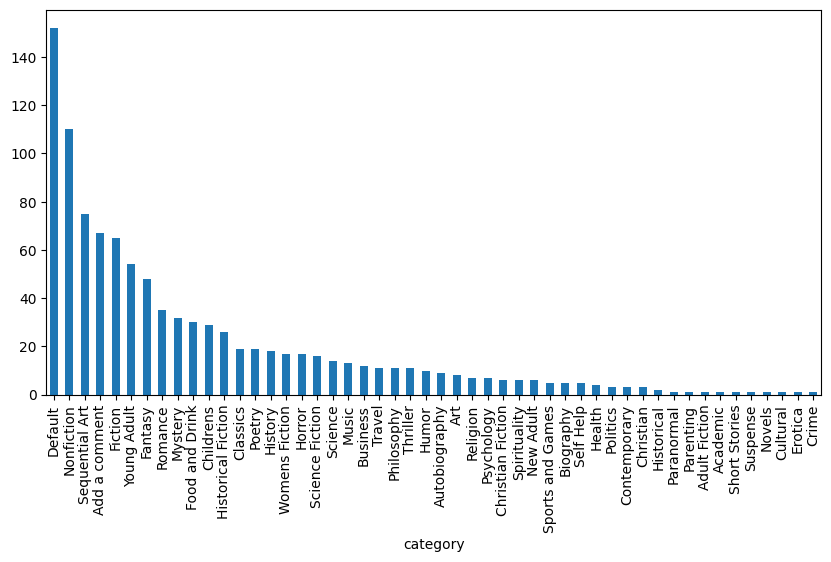

In [176]:
cat_df["category"].value_counts().plot.bar(figsize=(10, 5))

<Axes: xlabel='category', ylabel='rating'>

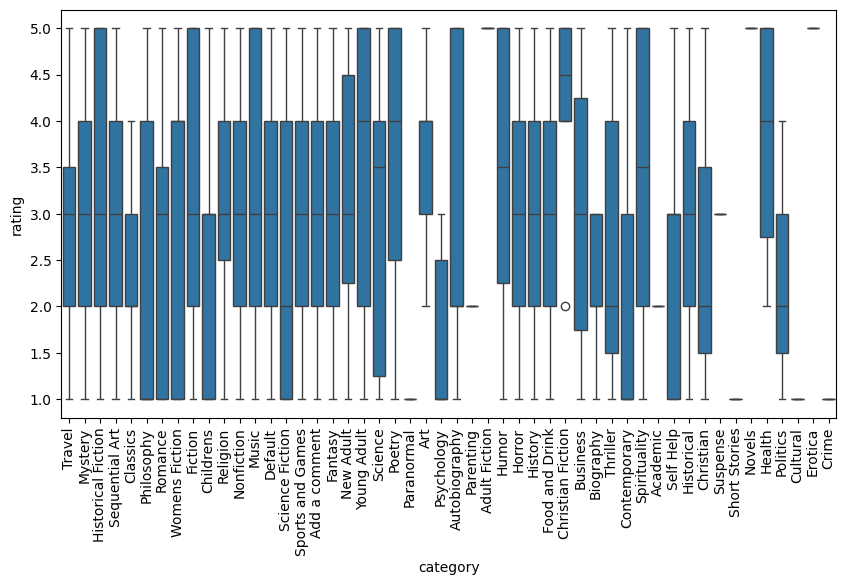

In [216]:
fig, ax = plt.subplots(1, figsize=(10,6))
fig.autofmt_xdate(rotation=90, ha='center')

sns.boxplot(data=cat_df, x="category", y="rating", ax=ax)

<Axes: xlabel='category', ylabel='price'>

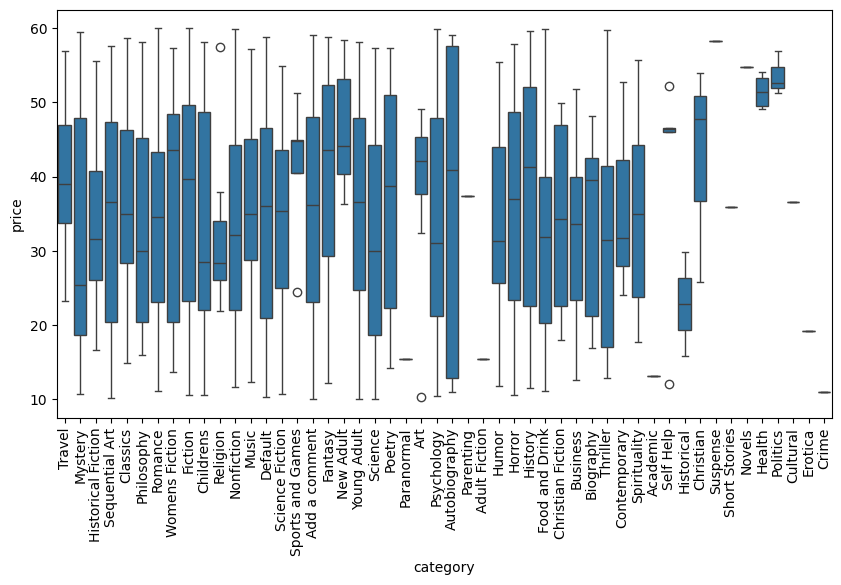

In [217]:
fig, ax = plt.subplots(1, figsize=(10,6))
fig.autofmt_xdate(rotation=90, ha='center')

sns.boxplot(data=cat_df, x="category", y="price", ax=ax)